# Network partitioning - synthetic data
---

## Imports
---

In [1]:
import networkx as nx
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import osmnx as ox
import geopandas as gpd 
import momepy

%matplotlib inline

## Data
---

In [2]:
gdf = gpd.read_file("shp_files/polygons/polygon_merged_2.shp")

In [3]:
ofer_network = gpd.read_file("shp_files/StreetNetwork")

In [4]:
print(ofer_network.crs)     

None


In [5]:
print(gdf.crs)   

epsg:4326


In [6]:
ofer_network = ofer_network.set_crs('epsg:2039')

In [7]:
gdf = gdf.to_crs('epsg:2039')

In [8]:
print(ofer_network.crs)    

epsg:2039


In [11]:
gdf = gdf.set_index('id')
gdf

,GEO_CODE,Age_Mean,Age_Median,Population,Shared_dwe,Unshared_d,Unshared_W,Unshared_F,One_person,One_family,...,one_car,two_cars,three_cars,four_plus_,Owned_tenu,Social_ren,Private_re,Males,Females,geometry
id,,,,,,,,,,,,,,,,,,,,,
1,1,42.10929,42,1592,0,795,637,158,350,406,...,363,130,15,5,1076,180,293,795,797,"POLYGON ((179249.107 663037.803, 179059.946 66..."
2,2,40.15316,39,1678,0,768,585,183,286,429,...,383,154,32,11,1221,85,350,815,863,"POLYGON ((177931.499 662546.960, 177828.765 66..."


In [10]:
ofer_network[0:2]

,u,v,length,geometry
0,1,2,91.415350,"LINESTRING (178471.079 663105.366, 178483.416 ..."
1,1,14,0.079047,"LINESTRING (178471.079 663105.366, 178471.060 ..."


In [19]:
subgraphs = {}

In [21]:
i = 0
for index, polygon in gdf.iterrows():
    
    clipped = ofer_network.clip(polygon['geometry'])
    clipped = clipped[~clipped.is_empty]    
    subgraphs[index] = clipped

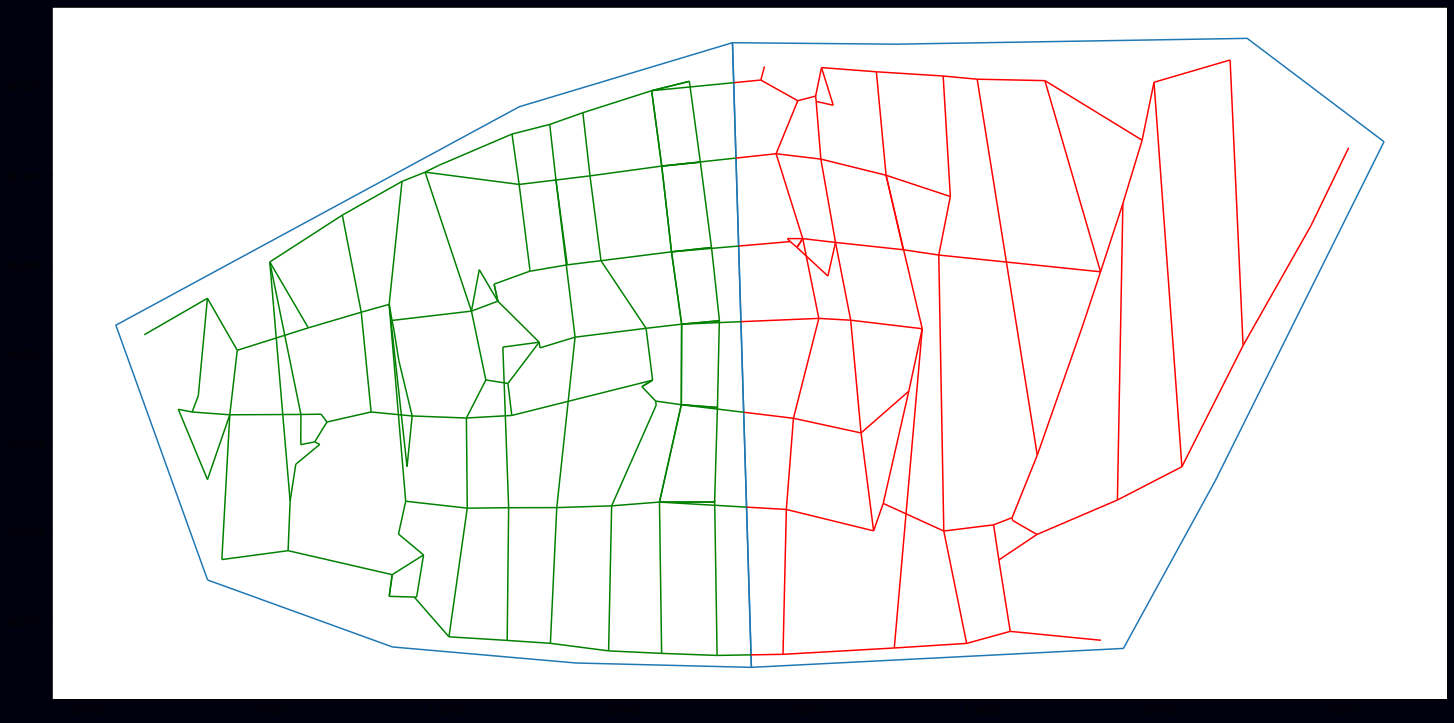

In [23]:
fig, ax = plt.subplots(figsize=(25, 25))
#ax.set_aspect('equal')

gdf.boundary.plot(ax=ax)
subgraphs[1].plot(ax=ax, color = 'red')
subgraphs[2].plot(ax=ax, color = 'green')

fig.set_facecolor("#00000F")
plt.show()

In [24]:
subgraphs_nx = {}

In [25]:
for i in subgraphs:
    subgraphs_nx[i] = momepy.gdf_to_nx(subgraphs[i], approach="primal")

In [26]:
subgraphs_nx

{1: <networkx.classes.multigraph.MultiGraph at 0x1efe5d18970>,
 2: <networkx.classes.multigraph.MultiGraph at 0x1efda10b070>}

In [27]:
sub_graphs_dict = {}

In [28]:
for key, value in subgraphs_nx.items():
    sub_graphs_dict[key] = pd.DataFrame(nx.adjacency_matrix(subgraphs_nx[key], nodelist=sorted(subgraphs_nx[key].nodes())).todense(), 
             index = sorted(subgraphs_nx[key].nodes()),
            columns = sorted(subgraphs_nx[key].nodes()))

In [29]:
sub_graphs_dict[1][0:2]

,"(178520.7235365087, 663103.9268812288)","(178523.2820860721, 663019.4977763685)","(178526.26780749662, 662920.972506099)","(178528.83478324552, 662836.2653470986)","(178531.90869983568, 662734.8297408329)","(178535.12915727793, 662628.5584600348)","(178540.1431173969, 662463.1037153993)","(178551.0883840486, 663106.8940703003)","(178555.24835110197, 663122.1087628714)","(178568.243822847, 663024.3532766422)",...,"(178932.00914865665, 662479.451756953)","(178950.484529172, 662636.531335858)","(178956.6097675703, 662968.5702305032)","(178978.1747814609, 663039.5419759592)","(178991.47668675464, 663104.3969367769)","(179022.72296005208, 662673.8242697803)","(179076.70704937892, 663129.3386879673)","(179091.23108425358, 662809.5218262211)","(179167.2839934806, 662943.8217018828)","(179209.50852678617, 663031.1102697516)"
"(178520.7235365087, 663103.9268812288)",0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"(178523.2820860721, 663019.4977763685)",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
gdf

,GEO_CODE,Age_Mean,Age_Median,Population,Shared_dwe,Unshared_d,Unshared_W,Unshared_F,One_person,One_family,...,one_car,two_cars,three_cars,four_plus_,Owned_tenu,Social_ren,Private_re,Males,Females,geometry
id,,,,,,,,,,,,,,,,,,,,,
1,1,42.10929,42,1592,0,795,637,158,350,406,...,363,130,15,5,1076,180,293,795,797,"POLYGON ((179249.107 663037.803, 179059.946 66..."
2,2,40.15316,39,1678,0,768,585,183,286,429,...,383,154,32,11,1221,85,350,815,863,"POLYGON ((177931.499 662546.960, 177828.765 66..."


In [31]:
#pickle.dump(gdf, open("pickle/gdf_oder.p", "wb"))

In [32]:
#pickle.dump(sub_graphs_dict, open("pickle/sub_graphs_ofer.p", "wb"))

In [33]:
subgraphs = pickle.load(open("pickle/sub_graphs_ofer.p", "rb"))

In [34]:
variables = pickle.load(open("pickle/gdf_oder.p", "rb"))

In [35]:
subgraphs[1][0:2]

,"(178520.7235365087, 663103.9268812288)","(178523.2820860721, 663019.4977763685)","(178526.26780749662, 662920.972506099)","(178528.83478324552, 662836.2653470986)","(178531.90869983568, 662734.8297408329)","(178535.12915727793, 662628.5584600348)","(178540.1431173969, 662463.1037153993)","(178551.0883840486, 663106.8940703003)","(178555.24835110197, 663122.1087628714)","(178568.243822847, 663024.3532766422)",...,"(178932.00914865665, 662479.451756953)","(178950.484529172, 662636.531335858)","(178956.6097675703, 662968.5702305032)","(178978.1747814609, 663039.5419759592)","(178991.47668675464, 663104.3969367769)","(179022.72296005208, 662673.8242697803)","(179076.70704937892, 663129.3386879673)","(179091.23108425358, 662809.5218262211)","(179167.2839934806, 662943.8217018828)","(179209.50852678617, 663031.1102697516)"
"(178520.7235365087, 663103.9268812288)",0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
"(178523.2820860721, 663019.4977763685)",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
variables

,GEO_CODE,Age_Mean,Age_Median,Population,Shared_dwe,Unshared_d,Unshared_W,Unshared_F,One_person,One_family,...,one_car,two_cars,three_cars,four_plus_,Owned_tenu,Social_ren,Private_re,Males,Females,geometry
id,,,,,,,,,,,,,,,,,,,,,
1,1,42.10929,42,1592,0,795,637,158,350,406,...,363,130,15,5,1076,180,293,795,797,"POLYGON ((179249.107 663037.803, 179059.946 66..."
2,2,40.15316,39,1678,0,768,585,183,286,429,...,383,154,32,11,1221,85,350,815,863,"POLYGON ((177931.499 662546.960, 177828.765 66..."
